
# 0. Necessary libraries

In [33]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 1.Downloading Data

In [6]:
# Green Taxi Trip Records January 2022 and 2023
df_green_jan_2022 = pd.read_parquet(r"C:\Users\Paula\OneDrive\Matematicas y estadistia-UCM\Matematicas y estadistica\TFG\Base de datos\Data (1)\Data\green_tripdata_2022-01.parquet")
df_green_jan_2023 = pd.read_parquet(r"C:\Users\Paula\OneDrive\Matematicas y estadistia-UCM\Matematicas y estadistica\TFG\Base de datos\Data (1)\Data\green_tripdata_2023-01.parquet")
# Green Taxi Trip Records August 2022 and 2023
df_green_aug_2022 = pd.read_parquet(r"C:\Users\Paula\OneDrive\Matematicas y estadistia-UCM\Matematicas y estadistica\TFG\Base de datos\Data (1)\Data\green_tripdata_2022-08.parquet")
df_green_aug_2023 = pd.read_parquet(r"C:\Users\Paula\OneDrive\Matematicas y estadistia-UCM\Matematicas y estadistica\TFG\Base de datos\Data (1)\Data\green_tripdata_2023-08.parquet")

In [13]:
# Join Green Taxi datasets
df_green_all = pd.concat([df_green_jan_2022, df_green_jan_2023, df_green_aug_2022, df_green_aug_2023])

In [7]:
# Yellow Taxi Trip Records January 2022 and 2023
df_yellow_jan_2022 = pd.read_parquet(r"C:\Users\Paula\OneDrive\Matematicas y estadistia-UCM\Matematicas y estadistica\TFG\Base de datos\Data (1)\Data\yellow_tripdata_2022-01.parquet")
df_yellow_jan_2023 = pd.read_parquet(r"C:\Users\Paula\OneDrive\Matematicas y estadistia-UCM\Matematicas y estadistica\TFG\Base de datos\Data (1)\Data\yellow_tripdata_2023-01.parquet")

# Yellow Taxi Trip Records August 2022 and 2023
df_yellow_aug_2022 = pd.read_parquet(r"C:\Users\Paula\OneDrive\Matematicas y estadistia-UCM\Matematicas y estadistica\TFG\Base de datos\Data (1)\Data\yellow_tripdata_2022-08.parquet")
df_yellow_aug_2023 = pd.read_parquet(r"C:\Users\Paula\OneDrive\Matematicas y estadistia-UCM\Matematicas y estadistica\TFG\Base de datos\Data (1)\Data\yellow_tripdata_2023-08.parquet")

In [12]:
# Join Yellow Taxi datasets
df_yellow_all = pd.concat([df_yellow_jan_2022, df_yellow_jan_2023, df_yellow_aug_2022, df_yellow_aug_2023])

In [39]:
# Read CSV file
taxi_zones = pd.read_csv(r"C:\Users\Paula\OneDrive\Matematicas y estadistia-UCM\Matematicas y estadistica\TFG\Base de datos\Data (1)\Data\taxi_zone_lookup.csv")

# 2.Data Visualization

In [38]:
print("Green Taxi Data:")
print(df_green_all.head())
print("\nYellow Taxi Data:")
print(df_yellow_all.head())

Green Taxi Data:
   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2022-01-01 00:14:21   2022-01-01 00:15:33                  N   
1         1  2022-01-01 00:20:55   2022-01-01 00:29:38                  N   
2         1  2022-01-01 00:57:02   2022-01-01 01:13:14                  N   
3         2  2022-01-01 00:07:42   2022-01-01 00:15:57                  N   
4         2  2022-01-01 00:07:50   2022-01-01 00:28:52                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            42            42              1.0           0.44   
1         1.0           116            41              1.0           2.10   
2         1.0            41           140              1.0           3.70   
3         1.0           181           181              1.0           1.69   
4         1.0            33           170              1.0           6.26   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount 

In [35]:
# DataFrame Information
print("\nGreen Taxi Data Info:")
print(df_green_all.info())
print("\nYellow Taxi Data Info:")
print(df_yellow_all.info())


Green Taxi Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 257284 entries, 0 to 60648
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               257284 non-null  int64         
 1   lpep_pickup_datetime   257284 non-null  datetime64[us]
 2   lpep_dropoff_datetime  257284 non-null  datetime64[us]
 3   store_and_fwd_flag     236884 non-null  object        
 4   RatecodeID             236884 non-null  float64       
 5   PULocationID           257284 non-null  int64         
 6   DOLocationID           257284 non-null  int64         
 7   passenger_count        236884 non-null  float64       
 8   trip_distance          257284 non-null  float64       
 9   fare_amount            257284 non-null  float64       
 10  extra                  257284 non-null  float64       
 11  mta_tax                257284 non-null  float64       
 12  tip_amount             2572

In [36]:
print(taxi_zones.head())

   LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone


In [37]:
print(taxi_zones.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       265 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB
None


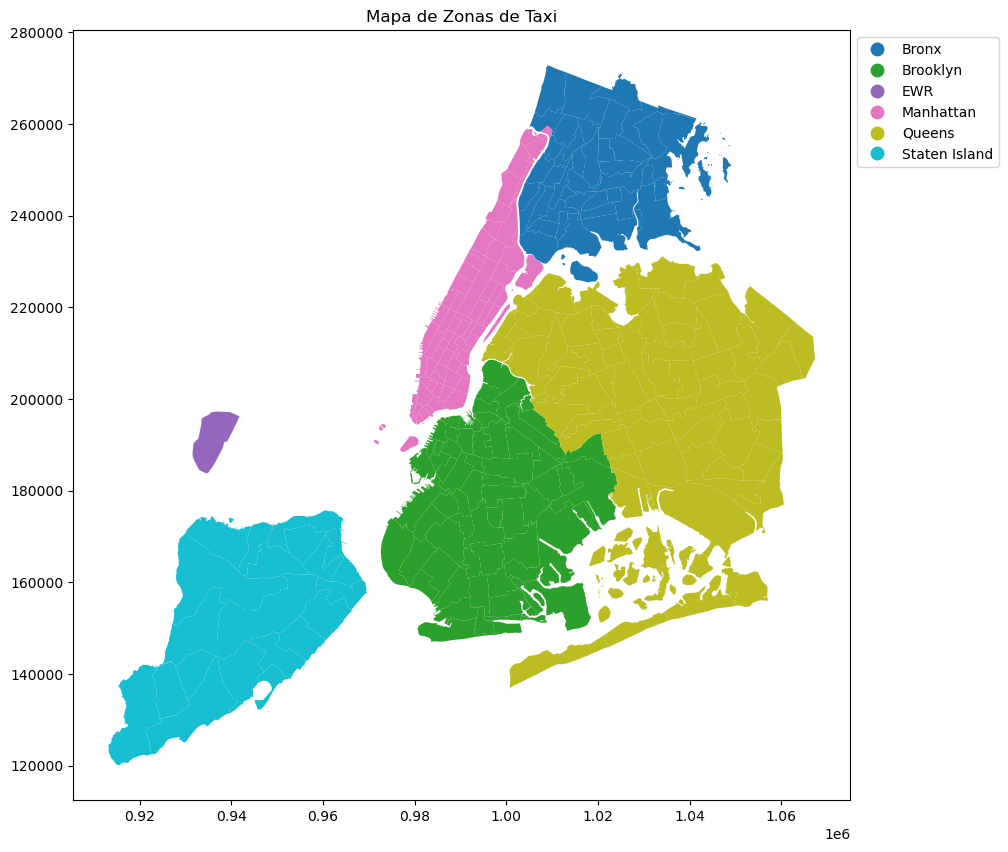

In [31]:
# NYC Bourgh 
taxi_zones_geo = gpd.read_file(r"C:\Users\Paula\OneDrive\Matematicas y estadistia-UCM\Matematicas y estadistica\TFG\Base de datos\Data (1)\Data\taxi_zones\taxi_zones\taxi_zones.shp")

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
taxi_zones_geo.plot(column='borough', ax=ax, legend=True,
                    legend_kwds={'bbox_to_anchor': (1, 1), 'loc': 'upper left'})
ax.set_title('Mapa de Zonas de Taxi')
plt.show()


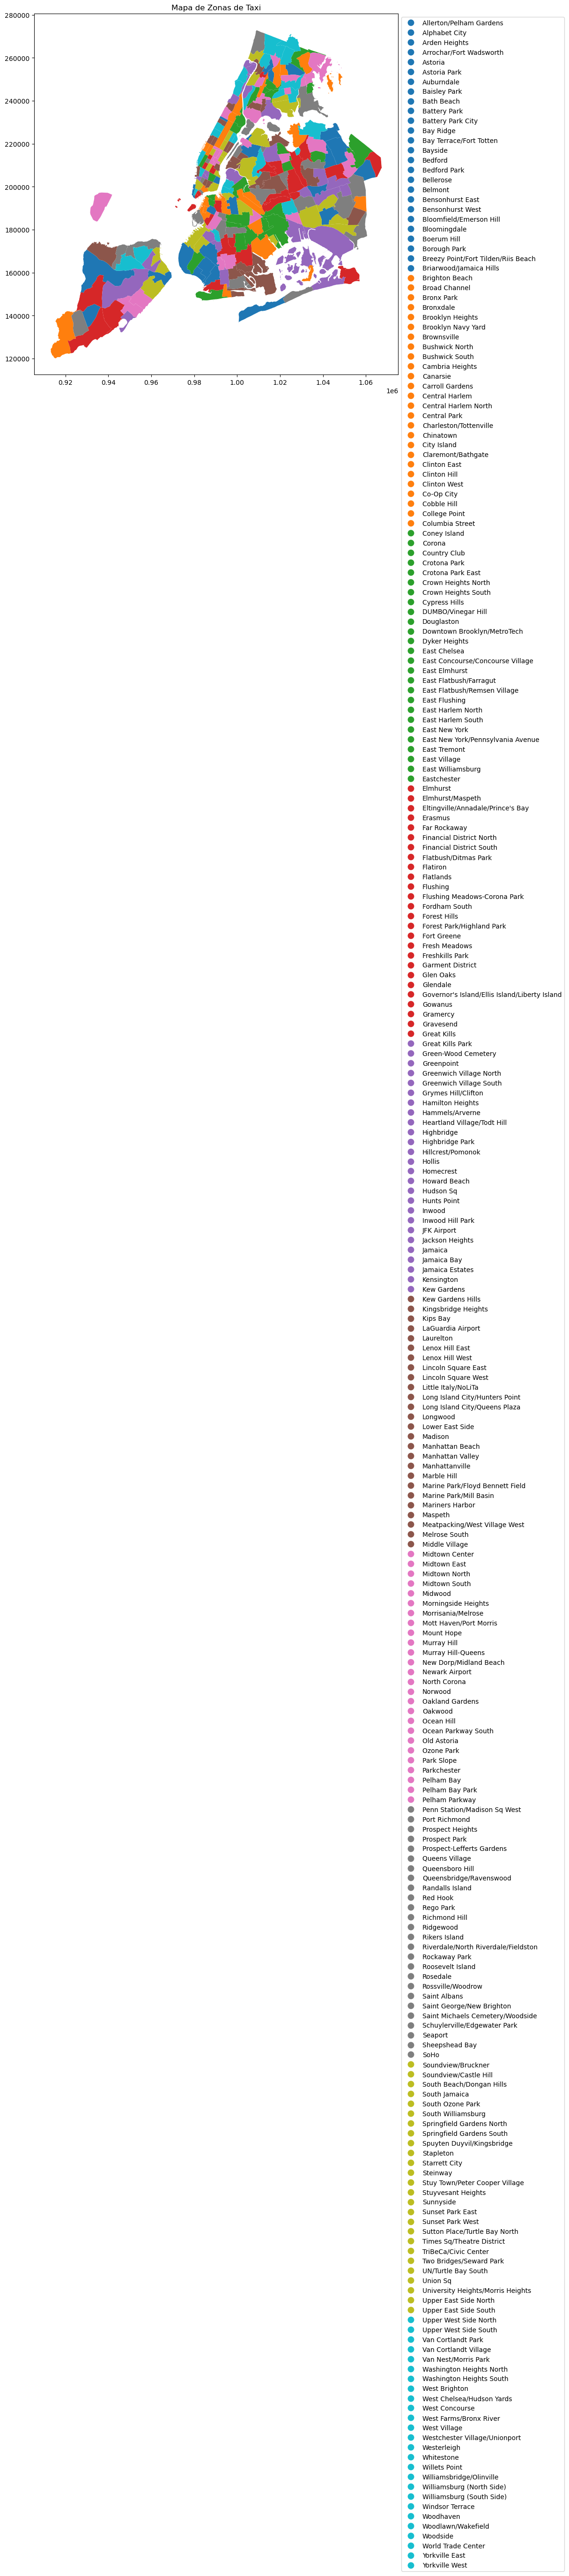

In [32]:
# NYC Zones 
taxi_zones_geo = gpd.read_file(r"C:\Users\Paula\OneDrive\Matematicas y estadistia-UCM\Matematicas y estadistica\TFG\Base de datos\Data (1)\Data\taxi_zones\taxi_zones\taxi_zones.shp")

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
taxi_zones_geo.plot(column='zone', ax=ax, legend=True,
                    legend_kwds={'bbox_to_anchor': (1, 1), 'loc': 'upper left'})
ax.set_title('Mapa de Zonas de Taxi')
plt.show()

## Data Dictionary - Green Taxis Trip Records

## VendorIDD
A code indicating the LPEP provider that provided the record.
- **1** = Creative Mobile Technologies, LLC
- **2** = VeriFone Inc.

### lpep_pickup_datetime
The date and time when the meter was engaged.

### lpep_dropoff_datetime
The date and time when the meter was di
### Store_and_fwd_flag
This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
- **Y** = store and forward trip
- **N** = not a store and forward trip

### RateCodeID
The final rate code in effect at the end of the trip.
- **1** = Standard rate
- **2** = JFK
- **3** = Newark
- **4** = Nassau or Westchester
- **5** = Negotiated fare
- **6** = Group ride

### PULocationID
TLC Taxi Zone in which the taximeter was engaged.

### DOLocationID
TLC Taxi Zone in which the taximeter was disengaged.
sengaged.

### Passenger_count
The number of passengers in the vehicle. This is a driver-entered value.

### Trip_distance
The elapsed trip distance in miles reported b 

### Fare_amount
The time-and-distance fare calculated by the meter.

### Extra
Miscellaneous extras and surcharges. Currently, this only includes the MTA_tax $0.50 MTA tax that is automatically triggered based on the metered rate in use.

### MTA_tax
$0.50 MTA tax that is automatically triggered based on the metered rate in use.y
### Tip_amount
Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.

### Tolls_amount
Total amount of all tolls paid in trip.

### Improvement_surcharge
$0.30 improvement surcharge assessed on hailed trips at the flag drop. The improvement surcharge began being levied in 2015.

### Total_amount
The total amount charged to passengers. Does not include cash tips.

### Payment_type
A numeric code signifying how the passenger paid for the trip.
- **1** = Credit card
- **2** = Cash
- **3** = No charge
- **4** = Dispute
- **5** = Unknown
- **6** = Voided trip

The total amount charged to passengers. Does not include cash tips.

### Trip_type
A code indicating whether the trip was a street-hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver.
- **1** = Street-hail
- **2** = Dispat
### Congestion_Surcharge
Total amount collected in trip for NYS congestion surcharge.ch
can be altered by the driver.
- **1** = Street-hail
- **2** = Dispatch


## Data Dictionary - Yellow Taxis Trip Records

### VendorID
A code indicating the TPEP provider that provided the record.
- **1** = Creative Mobile Technologies, LLC
- **2** = VeriFone Inc.

### tpep_pickup_datetime
The date and time when the meter was engaged.

### tpep_dropoff_datetime
The date and time when the meter was disengaged.

### Passenger_count
The number of passengers in the vehicle. This is a driver-entered value.

### Trip_distance
The elapsed trip distance in miles reported 

### RateCodeID
The final rate code in effect at the end of the trip.
- **1** = Standard rate
- **2** = JFK
- **3** = Newark
- **4** = Nassau or Westchester
- **5** = Negotiated fare
- **6** = Group ride
ated fare
- **6** = Group ride

### Store_and_fwd_flag
This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
- **Y** = store and forward trip
- 
### PULocationID
TLC Taxi Zone in which the taximeter was engaged.

### DOLocationID
TLC Taxi Zone in which the taximeter was disengaged.
*### Payment_type
A numeric code signifying how the passenger paid for the trip.
- **1** = Credit card
- **2** = Cash
- **3** = No charge
- **4** = Dispute
- **5** = Unknown
- **6** = Voided trippute
- **5** = Unknown
- **6** = Voided trip

### Fare_amount
The time-and-distance fare calculated by the meter.

### Extra
Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.

### MTA_tax
$0.50 MTA tax that is autop. The improvement surcharge began being levied in 2015.

### Tip_amount
Tip amount – This field is automatically populated for credit card tips. Cash tips are not includ

### Improvement_surcharge
$0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.
d.

### Tolls_amount
Total amount of all tolls paid in trip.

### Total_amount
The total amount charged to passengers. Does not include cash tips.

### Congestion_Surcharge
Total amount collected in trip for NYS congestion surcharge.

### Airport_fee
$1.25 for pick up only at LaGuardia and John F. Kennedy Airports.


# 3.Create One DataSet

The diffrence between the Green Taxi dataset and Yellow Taxi dataset is trip_type from the Green Taxi dataset and Airport_fee  from the Yellow Taxi datasetare only available in the Yellow Taxi.
We are going to create one dataset with all the trips. 

In [40]:
# Create a new column indicating taxi type
df_green_jan_2022['taxi_type'] = 'green'
df_green_jan_2023['taxi_type'] = 'green'
df_green_aug_2022['taxi_type'] = 'green'
df_green_aug_2023['taxi_type'] = 'green'

df_yellow_jan_2022['taxi_type'] = 'yellow'
df_yellow_jan_2023['taxi_type'] = 'yellow'
df_yellow_aug_2022['taxi_type'] = 'yellow'
df_yellow_aug_2023['taxi_type'] = 'yellow'

In [41]:
# Rename the pickup_datetime column and the dropoff_datetime column
df_green_jan_2022.rename(columns={'lpep_pickup_datetime': 'pickup_datetime', 'lpep_dropoff_datetime': 'dropoff_datetime'}, inplace=True)
df_green_jan_2023.rename(columns={'lpep_pickup_datetime': 'pickup_datetime', 'lpep_dropoff_datetime': 'dropoff_datetime'}, inplace=True)
df_green_aug_2022.rename(columns={'lpep_pickup_datetime': 'pickup_datetime', 'lpep_dropoff_datetime': 'dropoff_datetime'}, inplace=True)
df_green_aug_2023.rename(columns={'lpep_pickup_datetime': 'pickup_datetime', 'lpep_dropoff_datetime': 'dropoff_datetime'}, inplace=True)

df_yellow_jan_2022.rename(columns={'tpep_pickup_datetime': 'pickup_datetime', 'tpep_dropoff_datetime': 'dropoff_datetime'}, inplace=True)
df_yellow_jan_2023.rename(columns={'tpep_pickup_datetime': 'pickup_datetime', 'tpep_dropoff_datetime': 'dropoff_datetime'}, inplace=True)
df_yellow_aug_2022.rename(columns={'tpep_pickup_datetime': 'pickup_datetime', 'tpep_dropoff_datetime': 'dropoff_datetime'}, inplace=True)
df_yellow_aug_2023.rename(columns={'tpep_pickup_datetime': 'pickup_datetime', 'tpep_dropoff_datetime': 'dropoff_datetime'}, inplace=True)


In [43]:
# Select the columns to keep 
columns_to_keep = [
    'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'trip_distance',
    'PULocationID', 'DOLocationID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type',
    'fare_amount', 'extra', 'mta_tax', 'improvement_surcharge', 'tip_amount',
    'tolls_amount', 'total_amount', 'congestion_surcharge' , 'taxi_type'
]

df_green_jan_2022 = df_green_jan_2022[columns_to_keep]
df_green_jan_2023 = df_green_jan_2023[columns_to_keep]
df_green_aug_2022 = df_green_aug_2022[columns_to_keep]
df_green_aug_2023 = df_green_aug_2023[columns_to_keep]

df_yellow_jan_2022 = df_yellow_jan_2022[columns_to_keep]
df_yellow_jan_2023 = df_yellow_jan_2023[columns_to_keep]
df_yellow_aug_2022 = df_yellow_aug_2022[columns_to_keep]
df_yellow_aug_2023 = df_yellow_aug_2023[columns_to_keep]

In [44]:
# Combinar los DataFrames en uno solo
df_all = pd.concat([
    df_green_jan_2022, df_green_jan_2023,
    df_green_aug_2022, df_green_aug_2023,
    df_yellow_jan_2022, df_yellow_jan_2023,
    df_yellow_aug_2022, df_yellow_aug_2023
], ignore_index=True)

# Mostrar las primeras filas del DataFrame combinado
print(df_all.head())


      pickup_datetime    dropoff_datetime  passenger_count  trip_distance  \
0 2022-01-01 00:14:21 2022-01-01 00:15:33              1.0           0.44   
1 2022-01-01 00:20:55 2022-01-01 00:29:38              1.0           2.10   
2 2022-01-01 00:57:02 2022-01-01 01:13:14              1.0           3.70   
3 2022-01-01 00:07:42 2022-01-01 00:15:57              1.0           1.69   
4 2022-01-01 00:07:50 2022-01-01 00:28:52              1.0           6.26   

   PULocationID  DOLocationID  RatecodeID store_and_fwd_flag  payment_type  \
0            42            42         1.0                  N           2.0   
1           116            41         1.0                  N           2.0   
2            41           140         1.0                  N           1.0   
3           181           181         1.0                  N           2.0   
4            33           170         1.0                  N           1.0   

   fare_amount  extra  mta_tax  improvement_surcharge  tip_amount  \

# 4.Data Check

There could be some errors in the data we have dowloaded, we are going to check some information in order to have a good judgement of the conclusions we are going to obtein.

In [54]:
df_all['trip_distance'].describe().to_frame()

,trip_distance
count,"11,764,867.000000"
mean,5.709722
std,534.868826
min,0.000000
25%,1.090000
50%,1.820000
75%,3.460000
max,"345,729.440000"


There seems to be some outliers:

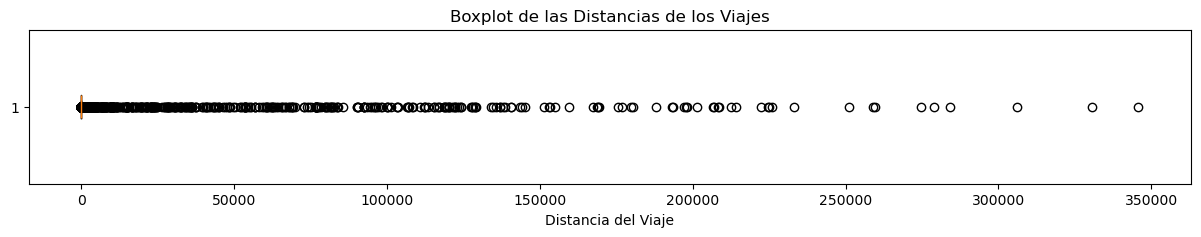

In [68]:
plt.figure(figsize=(15, 2))
plt.boxplot(df_all['trip_distance'], vert=False)
plt.title('Boxplot de las Distancias de los Viajes')
plt.xlabel('Distancia del Viaje')
plt.show()

In [71]:
percentile_99 = df_all['trip_distance'].quantile(0.99)
percentile_999 = df_all['trip_distance'].quantile(0.999)

print(f"99% Percentile: {percentile_99}")
print(f"99.9% Percentile: {percentile_999}")

99% Percentile: 20.2
99.9% Percentile: 30.2


In [73]:
# Filter data to eliminate outliers above the 99.9% percentile:
df_filtered = df_all[df_all['trip_distance'] <= percentile_999]

print(df_filtered['trip_distance'].describe())

count   11,753,107.000000
mean             3.405953
std              4.304277
min              0.000000
25%              1.090000
50%              1.820000
75%              3.450000
max             30.200000
Name: trip_distance, dtype: float64


# 5.Route and Demand Data Analysis

## Trip distance distribution by day of the week
Break down the trip distance distribution for each day of week

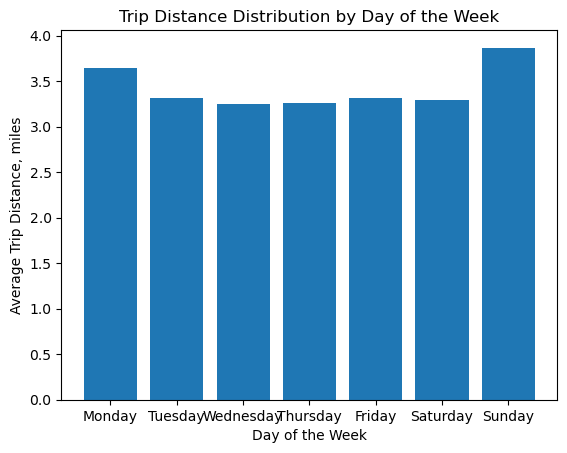

In [78]:
# Convert the tpep_pickup_datetime column to datetime if it's not already
df_filtered.loc['pickup_datetime'] = pd.to_datetime(df_filtered['pickup_datetime'])

# Extract the day of the week
df_filtered.loc[:, 'pickup_day_of_week'] = df_filtered['pickup_datetime'].dt.day_name()

# Calculate the average trip distance by day of the week
avg_trip_distance_by_day = df_filtered.groupby('pickup_day_of_week')['trip_distance'].mean().reset_index()

# Order the days of the week correctly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_trip_distance_by_day['pickup_day_of_week'] = pd.Categorical(avg_trip_distance_by_day['pickup_day_of_week'], categories=days_order, ordered=True)
avg_trip_distance_by_day = avg_trip_distance_by_day.sort_values('pickup_day_of_week')

# Plot the trip distance distribution
plt.bar(avg_trip_distance_by_day['pickup_day_of_week'], avg_trip_distance_by_day['trip_distance'])
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Distance, miles')
plt.title('Trip Distance Distribution by Day of the Week')
plt.show()

## Locations

In [83]:
# Calculate the number of distinct pickup locations
distinct_pickup_locations = df_filtered['PULocationID'].nunique()

# Calculate the number of distinct dropoff locations
distinct_dropoff_locations = df_filtered['DOLocationID'].nunique()

print("Number of distinct pickup locations:", distinct_pickup_locations)
print("Number of distinct dropoff locations:", distinct_dropoff_locations)

Number of distinct pickup locations: 262
Number of distinct dropoff locations: 262


In [88]:
taxi_zones.nunique()

LocationID      265
Borough           7
Zone            261
service_zone      4
dtype: int64

In [99]:
# Convertir las columnas de LocationID a conjuntos
pickup_locations = set(df_filtered['PULocationID'].unique())
dropoff_locations = set(df_filtered['DOLocationID'].unique())
all_taxi_locations = set(taxi_zones['LocationID'].unique())

# Obtener todas las locations usadas en df_filtered
all_used_locations = pickup_locations.union(dropoff_locations)

# Encontrar las LocationIDs que están en taxi_zones pero no en df_filtered
locations_not_in_filtered = all_taxi_locations - all_used_locations

# Convertir a lista y ordenar (opcional)
locations_not_in_filtered = sorted(list(locations_not_in_filtered))

# Seleccionar las filas de taxi_zones para las primeras 3 LocationIDs que no están en df_filtered
locations_not_in_filtered_df = taxi_zones[taxi_zones['LocationID'].isin(locations_not_in_filtered)]

# Mostrar las filas seleccionadas
print(locations_not_in_filtered_df)

     LocationID    Borough                                           Zone  \
102         103  Manhattan  Governor's Island/Ellis Island/Liberty Island   
103         104  Manhattan  Governor's Island/Ellis Island/Liberty Island   

    service_zone  
102  Yellow Zone  
103  Yellow Zone  


Seems that Governor's Island/Ellis Island/Liberty Island are the only locations that are not inthe Taxis dataset

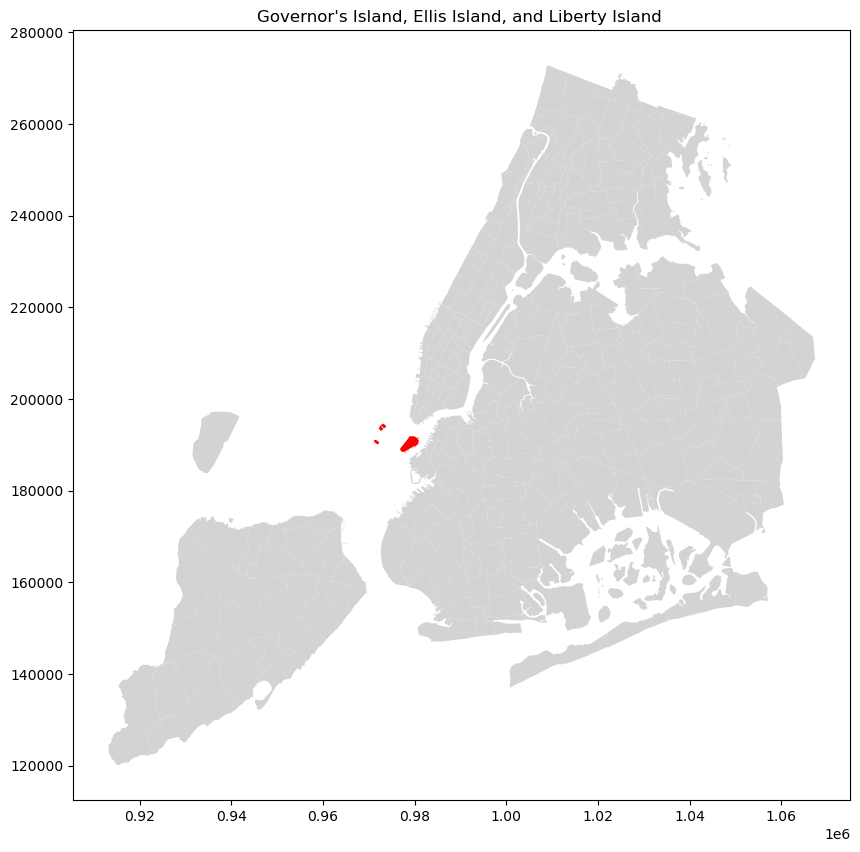

In [108]:
# Define the LocationIDs for Governor's Island, Ellis Island, and Liberty Island
location_ids = [103, 104]  # Make sure these are the correct LocationIDs

# Filter the GeoDataFrame to highlight the specific zones
highlighted_zones = taxi_zones_geo[taxi_zones_geo['LocationID'].isin(location_ids)]

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot all zones in light grey
taxi_zones_geo.plot(ax=ax, color='lightgrey')

# Highlight specific zones in red
highlighted_zones.plot(ax=ax, color='red')

# Add title
ax.set_title("Governor's Island, Ellis Island, and Liberty Island ")

# Show the plot
plt.show()

## January vs August

### Number of trips

In [113]:
# Filter the data for January and August
january_trips = df_filtered[df_filtered['pickup_datetime'].dt.month == 1]
august_trips = df_filtered[df_filtered['pickup_datetime'].dt.month == 8]

# Count the number of trips in each month
january_trip_count = january_trips.shape[0]
august_trip_count = august_trips.shape[0]

# Print the results
print(f"Number of trips in January: {january_trip_count}")
print(f"Number of trips in August: {august_trip_count}")
print(f"Difference between the number of trips in January and in August:{august_trip_count-january_trip_count}")

Number of trips in January: 5656723
Number of trips in August: 6096180
Difference between the number of trips in January and in August:439457


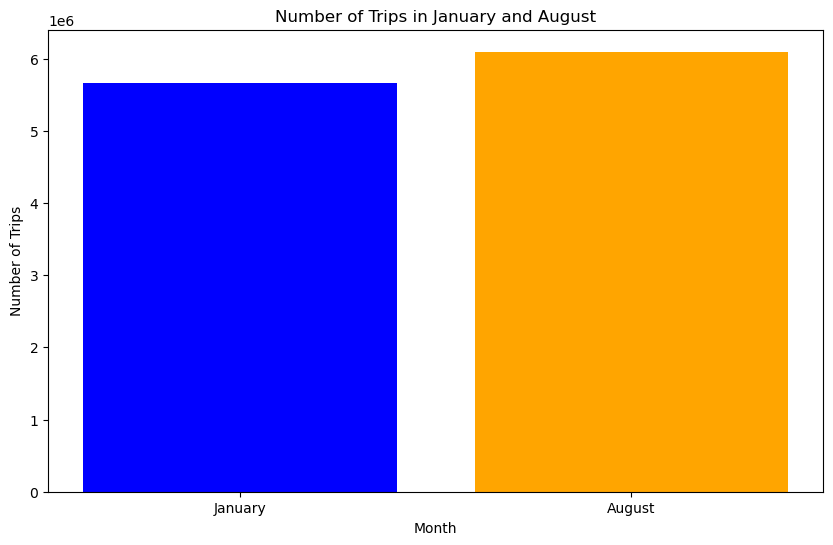

In [114]:
# Plotting the results
months = ['January', 'August']
trip_counts = [january_trip_count, august_trip_count]

plt.figure(figsize=(10, 6))
plt.bar(months, trip_counts, color=['blue', 'orange'])
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Number of Trips in January and August')
plt.show()

### Number of Taxi Pickups by Day of the Week and Hour of the Day

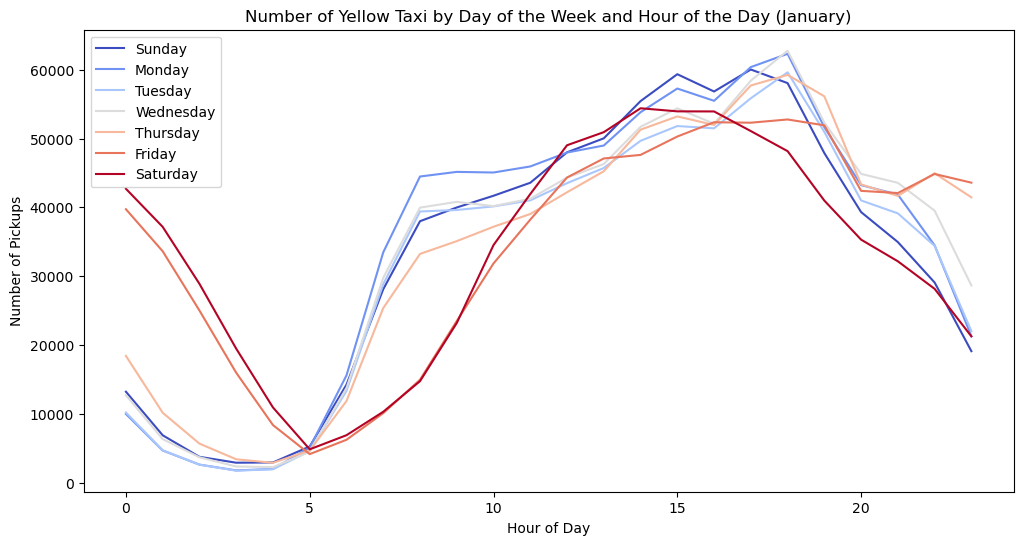

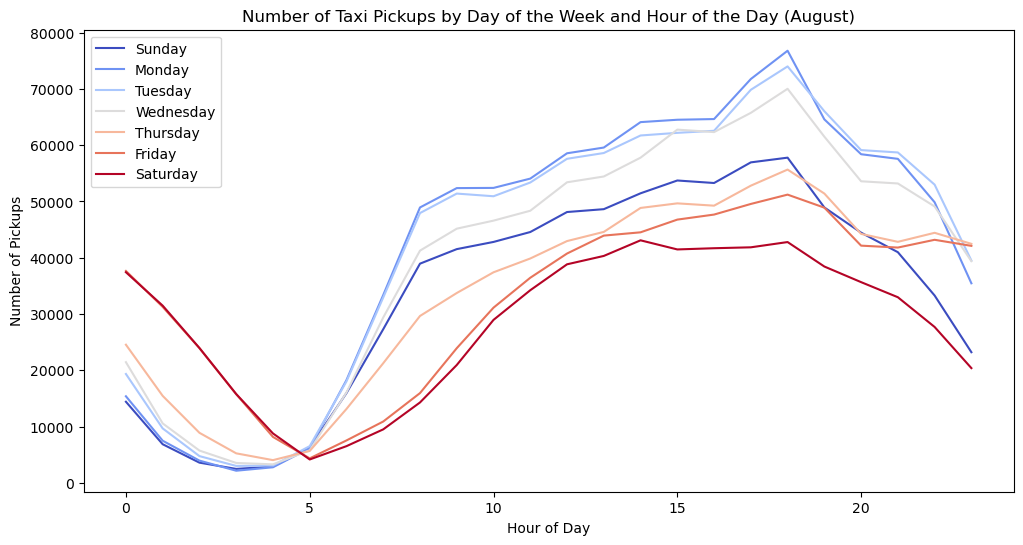

In [86]:
# Convert the pickup_datetime column to datetime if it's not already
df_filtered.loc[:, 'pickup_datetime'] = pd.to_datetime(df_filtered['pickup_datetime'])

# Extract the month, day of the week, and hour of the day
df_filtered.loc[:, 'month'] = df_filtered['pickup_datetime'].dt.month
df_filtered.loc[:, 'day_of_week'] = df_filtered['pickup_datetime'].dt.dayofweek + 1  # +1 to match DAYOFWEEK function (1 = Sunday)
df_filtered.loc[:, 'hour_of_day'] = df_filtered['pickup_datetime'].dt.hour

# Filter for January (month = 1) and August (month = 8)
filtered_data = df_filtered[df_filtered['month'].isin([1, 8])]

# Compute the number of pickups by month, day of the week, and hour of the day
pickup_counts = filtered_data.groupby(['month', 'day_of_week', 'hour_of_day']).size().reset_index(name='pickup_count')

# Pivot the data to create a table indexed by hour of the day and columns as days of the week, for each month
pickup_pivot_january = pickup_counts[pickup_counts['month'] == 1].pivot(index='hour_of_day', columns='day_of_week', values='pickup_count')
pickup_pivot_august = pickup_counts[pickup_counts['month'] == 8].pivot(index='hour_of_day', columns='day_of_week', values='pickup_count')

# Plotting the time series for January
fig, ax = plt.subplots(figsize=(12, 6))
pickup_pivot_january.plot(ax=ax, cmap='coolwarm')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Pickups')
ax.set_title('Number of Yellow Taxi by Day of the Week and Hour of the Day (January)')
ax.legend(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()

# Plotting the time series for August
fig, ax = plt.subplots(figsize=(12, 6))
pickup_pivot_august.plot(ax=ax, cmap='coolwarm')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Pickups')
ax.set_title('Number of Taxi Pickups by Day of the Week and Hour of the Day (August)')
ax.legend(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()

In [117]:
# Display the pivot tables for January and August
print("Pickup Counts - January")
print(pickup_pivot_january)

print("\nPickup Counts - August")
print(pickup_pivot_august)

Pickup Counts - January
day_of_week  1.000000  2.000000  3.000000  4.000000  5.000000  6.000000  \
hour_of_day                                                               
0.000000        13220      9985     10198     12714     18421     39730   
1.000000         6891      4682      4714      6333     10166     33623   
2.000000         3763      2627      2620      3701      5679     25015   
3.000000         2906      1789      1743      2355      3406     15975   
4.000000         2944      1994      1959      2268      2893      8376   
5.000000         5265      5088      4601      4512      4676      4157   
6.000000        14243     15594     13334     13753     11867      6235   
7.000000        28109     33464     28844     29766     25365     10110   
8.000000        37987     44480     39399     39961     33236     14958   
9.000000        39984     45153     39617     40800     35091     23485   
10.000000       41686     45063     40140     40179     37184     31853   
1

In [119]:
# Calculate the difference and ratio between August and January pickups
pickup_difference = pickup_pivot_august - pickup_pivot_january
pickup_ratio = pickup_pivot_august / (pickup_pivot_january.replace(0, 1))  # Avoid division by zero

print("\nDifference in Pickups (August - January)")
print(pickup_difference)

print("\nRatio of Pickups (August / January)")
print(pickup_ratio)


Difference in Pickups (August - January)
day_of_week  1.000000  2.000000  3.000000  4.000000  5.000000  6.000000  \
hour_of_day                                                               
0.000000         1205      5410      9157      8739      6136     -2071   
1.000000          -16      2817      4971      4244      5301     -2342   
2.000000         -160      1338      2146      2050      3227     -1070   
3.000000         -412       381      1279      1196      1852      -206   
4.000000          -34       790      1132      1035      1159      -201   
5.000000         1025      1078      1936      1289      1008       213   
6.000000         1726      2684      4703      2314      1278      1314   
7.000000         -798       -79      4105      -374     -4095       802   
8.000000          970      4462      8544      1309     -3574      1003   
9.000000         1554      7227     11789      4372     -1350       453   
10.000000        1129      7351     10791      6421       

## Number of Pickups by Borough

In [121]:
# Ensure 'pickup_datetime' is in datetime format
df_filtered.loc[:, 'pickup_datetime'] = pd.to_datetime(df_filtered['pickup_datetime'])

# Merge df_filtered with taxi_zones_geo to get the borough information
df_filtered = df_filtered.merge(taxi_zones_geo[['LocationID', 'borough']], left_on='PULocationID', right_on='LocationID', how='left')

# Aggregate the number of pickups by borough
pickup_by_borough = df_filtered.groupby('borough').size().reset_index(name='pickup_count')

# Plotting the aggregated data
fig, ax = plt.subplots(figsize=(10, 6))
pickup_by_borough.plot(kind='bar', x='borough', y='pickup_count', ax=ax, color='blue', legend=False)
ax.set_xlabel('Borough')
ax.set_ylabel('Number of Pickups')
ax.set_title('Number of Taxi Pickups by Borough')
plt.show()

# Merge the aggregated data with the GeoDataFrame
taxi_zones_geo_borough = taxi_zones_geo.dissolve(by='borough', aggfunc='sum')
pickup_by_borough_geo = taxi_zones_geo_borough.merge(pickup_by_borough, on='borough')

# Plotting the data on a map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
pickup_by_borough_geo.plot(column='pickup_count', ax=ax, legend=True, legend_kwds={'label': "Number of Pickups"})
ax.set_title('Number of Taxi Pickups by Borough')
plt.show()

MemoryError: Unable to allocate 179. MiB for an array with shape (2, 11753108) and data type datetime64[us]